In [1]:
# Importar las librerías necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Cargar el dataset de Iris
iris = datasets.load_iris()
X = iris.data  # Características (longitud y anchura del sépalo y pétalo)
y = iris.target  # Clases (tipos de plantas)

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador SVM
clf = SVC(kernel='linear')  # Puedes cambiar el kernel si lo deseas (linear, rbf, poly, etc.)
clf.fit(X_train, y_train)  # Entrenar el modelo

# Realizar predicciones
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



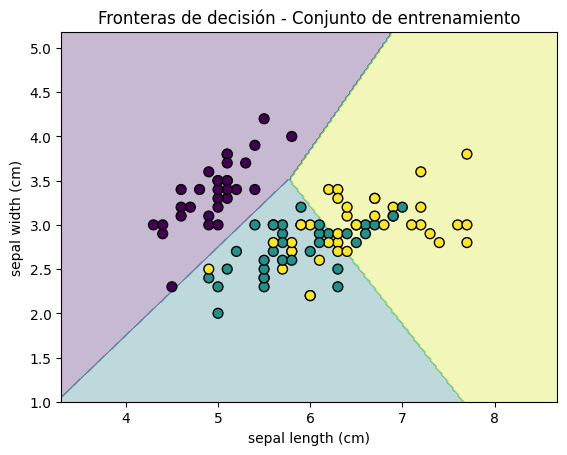

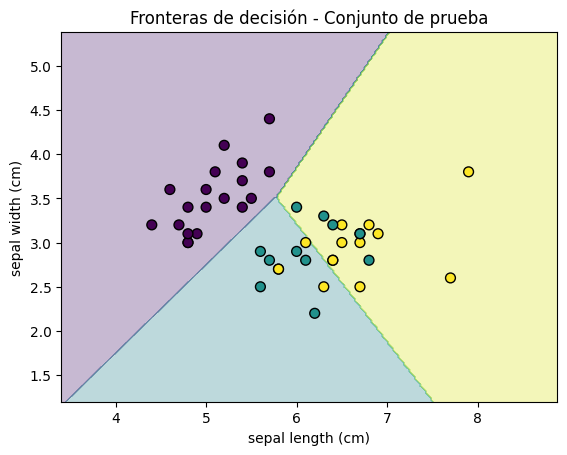

In [2]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Cargar el dataset de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usar solo las primeras dos características (largo y ancho del sépalo)
y = iris.target

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador SVM
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Crear un gráfico de los datos
def plot_decision_boundaries(X, y, clf, title):
    # Definir los límites del gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Obtener las predicciones en toda la malla de puntos
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar las fronteras de decisión
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Dibujar también los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Llamar a la función para visualizar el conjunto de entrenamiento
plot_decision_boundaries(X_train, y_train, clf, "Fronteras de decisión - Conjunto de entrenamiento")

# Llamar a la función para visualizar el conjunto de prueba
plot_decision_boundaries(X_test, y_test, clf, "Fronteras de decisión - Conjunto de prueba")


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

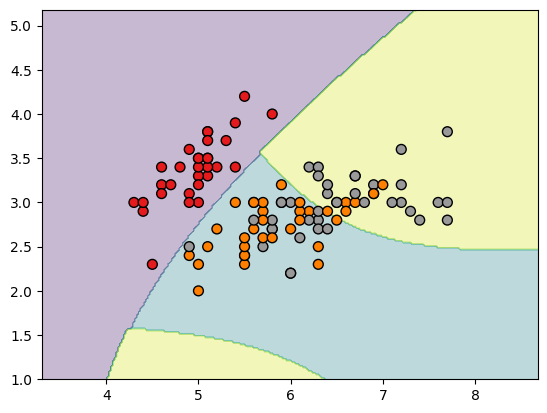

In [4]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Cargar el dataset de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usar solo las primeras dos características (largo y ancho del sépalo)
y = iris.target
class_names = iris.target_names  # Nombres de las clases

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir un kernel polinomial personalizado
def custom_kernel(X, Y):
    degree = 3  # Definir el grado del polinomio
    return (np.dot(X, Y.T) + 1) ** degree  # Kernel polinomial: (X.Y + 1)^3

# Crear y entrenar el clasificador SVM con el kernel personalizado
clf = SVC(kernel=custom_kernel)
clf.fit(X_train, y_train)

# Crear un gráfico de los datos con leyenda
def plot_decision_boundaries(X, y, clf, title):
    # Definir los límites del gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Obtener las predicciones en toda la malla de puntos
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar las fronteras de decisión
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Dibujar los puntos de datos y añadir una leyenda
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', s=50, cmap=plt.cm.Set1)

    # Añadir leyenda con las clases
    legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=class_names, title="Clases")
    plt.gca().add_artist(legend1)

    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Llamar a la función para visualizar el conjunto de entrenamiento
plot_decision_boundaries(X_train, y_train, clf, "Fronteras de decisión - Conjunto de entrenamiento con kernel personalizado")

# Llamar a la función para visualizar el conjunto de prueba
plot_decision_boundaries(X_test, y_test, clf, "Fronteras de decisión - Conjunto de prueba con kernel personalizado")
